In [1]:
import osmnx as ox
import networkx as nx
import helper_functions as hf
import numpy as np
import pickle

In [4]:

place = 'Pag'
graph_ox = ox.graph_from_place(place,network_type='drive')

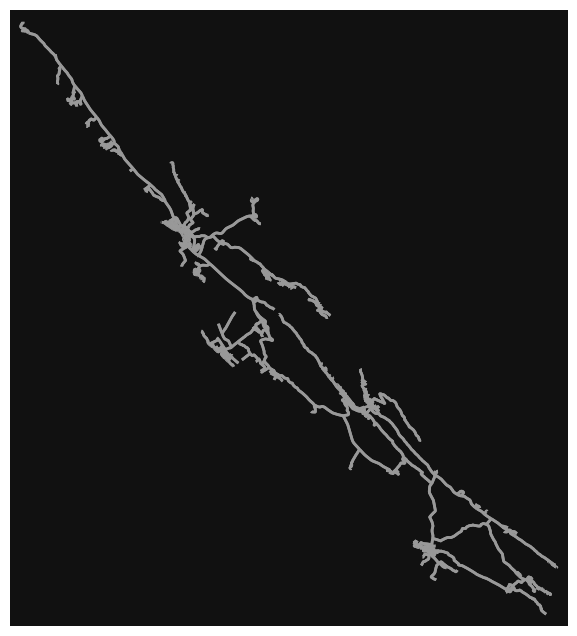

In [5]:
fig, ax = ox.plot_graph(graph_ox, edge_linewidth=2, node_size=0)

In [6]:

def place_to_nx(place,save = False):
    try:
        file = open('/home/lema/Documents/diplomska/dai/'+place+'_nx.pkl', 'rb')
        graph = pickle.load(file)
        file.close()
        return graph
    except:
        pass
    
    graph_ox = ox.graph_from_place(place,network_type='drive')

    graph = nx.convert_node_labels_to_integers(nx.DiGraph(graph_ox))

    hf.fill_maxspeed(graph)

    graph.edges(data=True)
    times = {e: np.round(graph.edges()[e]["length"]/graph.edges()[e]["maxspeed"]) for e in graph.edges()}
    capacities = {e: np.floor(1 + graph.edges()[e]["length"]*graph.edges()[e]["maxspeed"]/1000) for e in graph.edges()}
    nx.set_edge_attributes(graph, times,"c")
    nx.set_edge_attributes(graph, capacities,"cap")
    
    if save:
        file = open('/home/lema/Documents/diplomska/dai/'+place+'_nx.pkl', 'wb')
        pickle.dump(graph,file)
        file.close()
    
    return graph
    
place = 'Castenaso'
graph = place_to_nx(place,save=True)